In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn.csv")
# df.sample(5)

In [3]:
df = df.drop('customerID',axis='columns')
# df.dtypes

In [4]:
# // We'll have to convert this into a number column
# df.TotalCharges.values

In [5]:
# Some values have space as values in TotalCharges, we'll have to 
# first tackle that

pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [7]:
# df.shape

In [7]:
# Find value same as you would in a 2D array
df.iloc[48]['TotalCharges']

'4217.8'

In [8]:
df = df[df.TotalCharges!=' ']

In [9]:
# df.shape

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [26]:
# df.TotalCharges.values

In [19]:
df.TotalCharges.dtypes

dtype('float64')

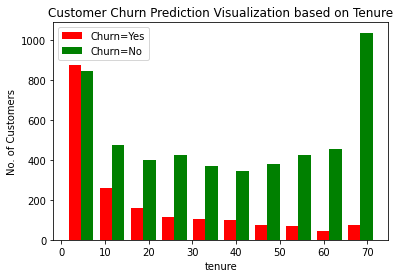

In [20]:
# df[df.Churn=='Yes']
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization based on Tenure')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()

In [21]:
# df[df.tenure>40]

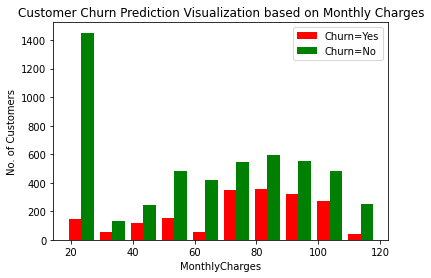

In [22]:

MonthlyCharges_churn_no = df[df.Churn == 'No'].MonthlyCharges
MonthlyCharges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization based on Monthly Charges')

plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color = ['red', 'green'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()

In [23]:
# Label Encoding
def print_unique_column_values(df) : 
    for col in df :
        if df[col].dtypes=='object':
            print(f' {col} : {df[col].unique()}')

In [24]:
print_unique_column_values(df)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No phone service' 'No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes' 'No internet service']
 OnlineBackup : ['Yes' 'No' 'No internet service']
 DeviceProtection : ['No' 'Yes' 'No internet service']
 TechSupport : ['No' 'Yes' 'No internet service']
 StreamingTV : ['No' 'Yes' 'No internet service']
 StreamingMovies : ['No' 'Yes' 'No internet service']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


In [20]:
# df[df.MultipleLines =='No phone service']
df.replace('No phone service', 'No', inplace = True)
# df[df.MultipleLines =='No phone service']

In [21]:
df.replace('No internet service', 'No', inplace = True)
# df[df.DeviceProtection == 'No internet service']

In [22]:
# print_unique_column_values(df)

In [23]:
# Replacing 'Yes' and 'No' with 1 and 0


In [24]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)

In [25]:
# print_unique_column_values(df)

In [26]:
# df.dtypes

In [27]:
# Alternatively, we can
# yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']     
# for col in yes_no_columns :
#     df[col].replace({'Yes': 1, 'No':0}, inplace = True)

In [28]:
# print_unique_column_values(df)

In [29]:
# for col in df :
#     print(f'{col}:{df[col].unique()}')

In [30]:
# df.dtypes

In [31]:
# Encoding Female and Male into 0 and 1
df['gender'].replace({'Female':1,'Male':0}, inplace=True)

In [32]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [33]:
# print_unique_column_values(df)

In [34]:
# pd.get_dummies(data=df,columns=['InternetService'])

In [35]:
# df.dtypes

In [36]:
# print_unique_column_values(df)

In [37]:
# pd.get_dummies(data=df,columns=['Contract'])

In [38]:
# pd.get_dummies(data=df,columns=['PaymentMethod'])

In [39]:
df_with_dummies=pd.get_dummies(data=df, columns=['InternetService', 'Contract','PaymentMethod'])

In [40]:
# df_with_dummies.columns

In [41]:
# df_with_dummies.sample(5)

In [42]:
# df_with_dummies.dtypes

In [43]:
# Scaling 


In [44]:
# for col in df_with_dummies :
#     print(f'{col}:{df_with_dummies[col].unique()}')

In [45]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [46]:
# min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_with_dummies[cols_to_scale]=scaler.fit_transform(df_with_dummies[cols_to_scale])

In [47]:
# df_with_dummies.sample(2)

In [48]:
# for col in df_with_dummies :
#     print(f'{col}:{df_with_dummies[col].unique()}')

In [49]:
df_X=df_with_dummies.drop('Churn', axis=1)

In [73]:
# for col in df_X:
#     print(f'{col}:{df_X[col].unique()}')

In [51]:
df_Y=df_with_dummies['Churn']

In [52]:
df_Y.sample(2)

2664    0
3369    0
Name: Churn, dtype: int64

In [53]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.25, random_state=5)

In [77]:
# X_train.shape

In [76]:
# X_test.shape

In [74]:
# X_train[:10]

In [75]:
# len(X_train.columns)

In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
model=keras.Sequential([
    # Hidden Layer
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
#   # Output Layer
    keras.layers.Dense(1, activation='sigmoid'),
    
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)  

model.fit(X_train, y_train, epochs=3)

Epoch 1/3
165/165 [==============================] - 2s 3ms/step - loss: 0.5219 - accuracy: 0.7425
Epoch 2/3
165/165 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.7928
Epoch 3/3
165/165 [==============================] - 1s 3ms/step - loss: 0.4193 - accuracy: 0.7986


In [60]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7878


[0.4435786306858063, 0.7878270745277405]

In [78]:
y_predicted = model.predict(X_test)
# y_predicted[:5]

55/55 [==============================] - 0s 2ms/step


In [79]:
# y_test[:5]

In [63]:
y_predicted_final=[]
for element in y_predicted:
    if(element<=0.5):
        y_predicted_final.append(0)
    else:
        y_predicted_final.append(1)

In [80]:
# y_predicted_final[:5]

In [65]:
# Classification Report 
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predicted_final))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1267
           1       0.64      0.54      0.59       491

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



Text(69.0, 0.5, 'Truth')

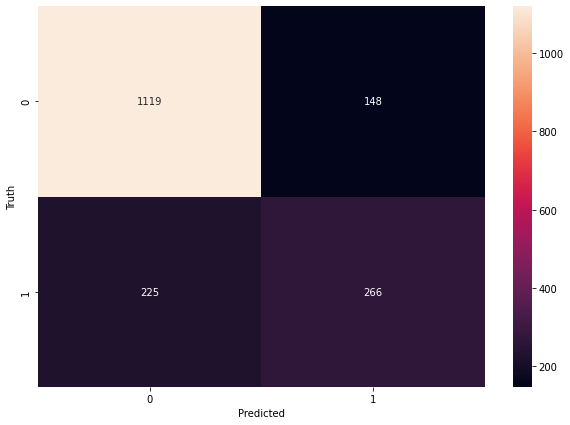

In [66]:
# Plotting Confusion Matrix

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_final)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
# Accuracy = Correct Predictions / Total Predictions 
# ((1121+260)/(1121+260+231+146))*100

In [68]:
# Precision 
# Precision for 0 class = 1121/1121+231 (no. of correct predictions / total predictions where outcome was 0)

In [82]:
# ((1121)/(1121+231))*100

In [70]:
# Precision 
# Precision for 1 class = 260/260+146 (no. of correct predictions / total predictions where outcome was 1)

In [81]:
# ((260)/(260+146))*100

In [72]:
# Recall